<a href="https://colab.research.google.com/github/janpeter19/CONF_2023_10_MODELICA15/blob/main/BPL_TEST2_PID_Fedbatch_reg6_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_PID_Fedbatch_reg6 script with FMPy 0.3.15

The key library FMPy ver 0.3.15 is installed.

After the installation a small application BPL_TEST2_PID_Fedbatch_reg6 is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.2 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-09-13 18:16:34--  https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74403966 (71M) [application/x-sh]
Saving to: ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’

Miniconda3-py310_23 100%[===================>]  70.96M   144MB/s    in 0.5s    

2023-09-13 18:16:35 (144 MB/s) - ‘Miniconda3-py310_23.1.0-1-Linux-x86_64.sh’ saved [74403966/74403966]

PREFIX=/usr/local
Unpacking payload ...
                                                                                     
Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |  py310h06a4308_0         430 KB
    ca-certificates-2023.08.22 |       h06a4308_0         123 KB
    certifi-2023.7.22          |  py310h06a4308_0         153 KB
    conda-23.7.4               |  py310h06a4308_0         1.0 MB
    conda-package-handling-2.2.0|  py310h06a4308_0         268 KB
    conda-package-streaming-0.9.0|  py310h06a4308_0          27 KB
    cryptography-41.0.3        |  py310hdda0065_0         2.0 MB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 K

In [ ]:
!conda --version
!python --version

conda 23.7.4
Python 3.10.13


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!conda install matplotlib --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    contourpy-1.0.5            |  py310hdb19cb5_0         204 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    libbrotlicommon-1.0.9      |       h5eee18b_7    

In [ ]:
#!conda install scipy --yes

In [ ]:
#!conda install xlrd --yes

In [ ]:
#!conda install openpyxl --yes

# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [ ]:
%%bash
git clone https://github.com/janpeter19/CONF_2023_10_MODELICA15

Cloning into 'CONF_2023_10_MODELICA15'...


In [ ]:
%cd CONF_2023_10_MODELICA15

/content/CONF_2023_10_MODELICA15


In [ ]:
run -i BPL_TEST2_PID_Fedbatch_reg6_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


<Figure size 984.252x787.402 with 0 Axes>

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



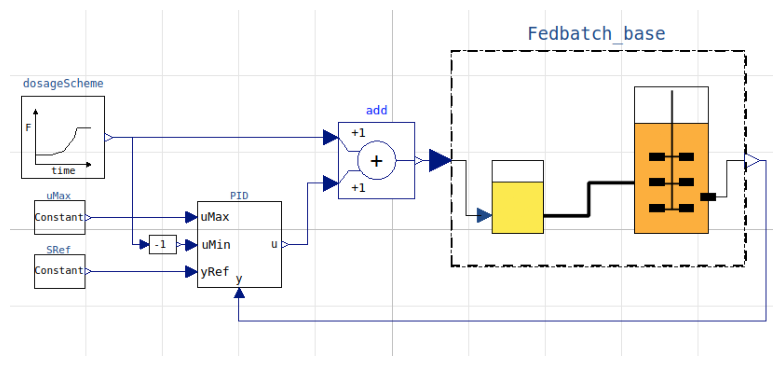

In [ ]:
process_diagram()

In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book mode - only substrate S and cell concentration X



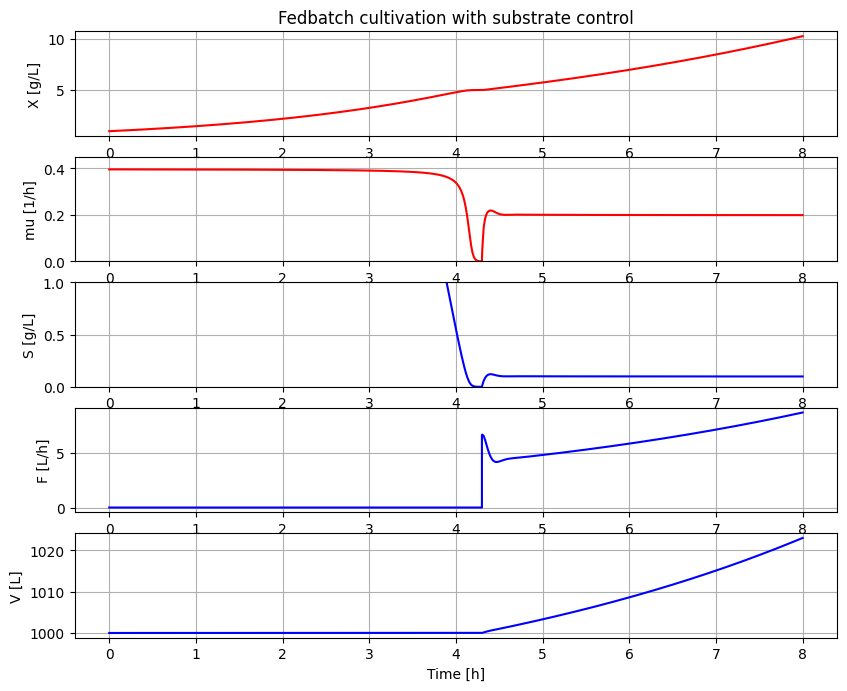

In [ ]:
par(Y=0.40, qSmax=1.0, Ks=0.1)
init(V_0=1e3, VX_0=1e3, VS_0=10*1e3)
# Culture parameters
# Process initialization
par(S_in=600)
par(t_start=4.3, F_start=4, mu_feed=0.2, F_max=35)
par(S_ref=0.1) # Substrate controller
par(t_regStart=4.3)
par(uMax=50)

newplot()
ax2.set_ylim([0, 0.45]); ax3.set_ylim([0, 1])
setLines(['-']);
par(K=30, Ti=0.5)
simu(8)

In [ ]:
disp(mode='long')

bioreactor.V_0 : V_0 : 1000.0
bioreactor.m_0[1] : VX_0 : 1000.0
bioreactor.m_0[2] : VS_0 : 10000.0
bioreactor.culture.Y : Y : 0.4
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.V_0 : feedtank_V_0 : 10.0
feedtank.c_in[2] : S_in : 600
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.F_0 : F_0 : 0.0
dosagescheme.t_start : t_start : 4.3
dosagescheme.F_start : F_start : 4
dosagescheme.F_max : F_max : 35
substrateSensor.x_0 : Sensor_x_0 : 0
substrateRef.k : S_ref : 0.1
t_regStart : t_regStart : 4.3
PIDreg.K : K : 30
PIDreg.Ti : Ti : 0.5
PIDreg.I_0 : I_0 : 0
uMax : uMax : 50


In [ ]:
describe('mu')

Cell specific growth rate variable : 0.199 [ 1/h ]


In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank', 'PIDreg', 'substrateRef', 'substrateSensor', 't_regStart', 'uMax']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.15
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0
 -FMI: 2.0
 -Type: ME
 -Name: BPL_TEST2_PID.Fedbatch_reg6
 -Generated: 2023-08-22T10:54:51Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1
 -Interaction: FMU-explore for FMPy version 0.9.8
